# Hands-on exercise

- Bir Google Colab not defteri oluşturun.
- Facebook/voxpopuli veri kümesinin train bölümünü akış modunda seçtiğiniz dilde yüklemek için Datasets'i kullanın.
- Veri kümesinin eğitim bölümünden üçüncü örneği alın ve inceleyin. Bu örneğin sahip olduğu özellikler göz önüne alındığında, bu veri kümesini ne tür ses görevleri için kullanabilirsiniz?
- Bu örneğin dalga biçimini ve spektrogramını çizin.
- Hub'a gidin, önceden eğitilmiş modelleri keşfedin ve daha önce seçtiğiniz dil için otomatik konuşma tanımada kullanılabilecek bir model bulun. Bulduğunuz modelle ilgili bir işlem hattı oluşturun ve örneği yazıya dökün.
- Pipeline'dan elde ettiğiniz transkripsiyonu örnekte verilen transkripsiyonla karşılaştırın.

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    "Facebook/voxpopuli", "en", split="train", streaming=True, trust_remote_code=True
)

In [2]:
third_example = next(iter(dataset.skip(2)))
third_example

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

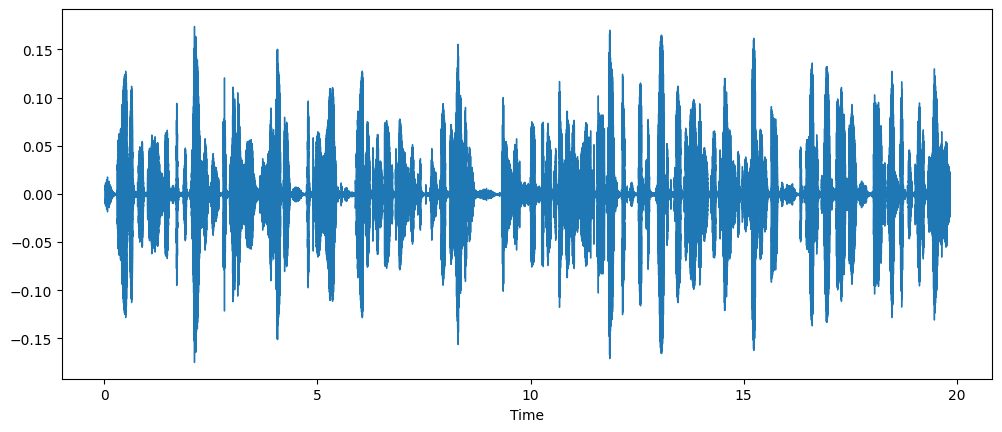

In [3]:
import librosa
import matplotlib.pyplot as plt

array = third_example["audio"]["array"]
sr = third_example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sr)

Text(0.5, 1.0, 'Mel-frequency spectrogram')

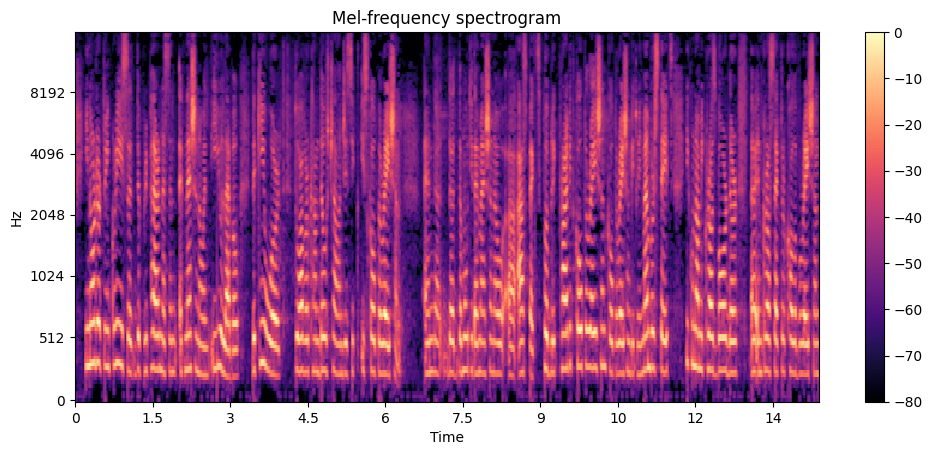

In [5]:
import numpy as np

plt.figure().set_figwidth(12)
spectrogram = librosa.feature.melspectrogram(y=array, sr=sr)
librosa.display.specshow(
    librosa.power_to_db(spectrogram, ref=np.max),
    y_axis='mel', 
    fmax=16_000, 
    x_axis='time'
)
plt.colorbar()
plt.title('Mel-frequency spectrogram')

In [9]:
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition")

transcription = pipe(third_example['audio']['array'])
print("Predicted transcription:", transcription['text'])
print()
print("Ground truth transcription:", third_example['normalized_text'])

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

Predicted transcription: IN ORDER TO INCREASE THE PREPARENESSEN ATNATIONAL AND EVIL LEVEL THE KEY WORD TO OVERCOME THOSE CHALLENGES IC ISCOPERATION AND  THETHE MOOTI DIMENSION OF A ASPECTS PUBLIC PRIVATE COPERATION COPERATION BETWEEN MEMBER STATES ECONOMI CROSS BORDER INCROSSECTOR COLOPERATION

Ground truth transcription: in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration
